# Playoff LeBron

Let's make some charts that investigate whether 'Playoff LeBron' really exists, and how he differs from his idols and contemporaries alike!

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid') # Set theme

## 1. Load full stats dataset (all players)
**Note: CAN SKIP ALL THIS AND JUST LOAD THE PRE-WRANGLED/FORMATTED CSV -- SKIP TO BOTTOM**

In [2]:
stats = pd.read_csv('/Users/TBD/Documents/DevStuff/DataSciProjects/NBAPlayerMovement/Seasons_Stats.csv')

In [3]:
#list(stats.columns.values)

# Remove unnecessary columns
unnecessary_cols = ["Unnamed: 0", "blanl", "blank2"]

stats.drop(unnecessary_cols, axis=1, inplace=True)

In [4]:
stats = stats[stats.Year >= 1980]
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [5]:
# Remove those pesky trailing asteric's
for n in stats['Player']:
    try:
        if n.endswith('*'):
            stats['Player'] = stats['Player'].replace(n, n[:-1])
    except:
        continue

In [6]:
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


### Load individual players playoff stats datasets

In [7]:
# First, load playoff totals
lbj_playoffs_totals = pd.read_csv('datasets/lebron_playoffs_totals.csv')  # LeBron
bird_playoffs_totals = pd.read_csv('datasets/bird_playoffs_totals.csv')   # Larry Bird
magic_playoffs_totals = pd.read_csv('datasets/magic_playoffs_totals.csv') # Magiv Johnson
kobe_playoffs_totals = pd.read_csv('datasets/kobe_playoffs_totals.csv')   # Kobe Bryant
curry_playoffs_totals = pd.read_csv('datasets/curry_playoffs_totals.csv') # Steph Curry
chrispaul_playoffs_totals = pd.read_csv('datasets/chrispaul_playoffs_totals.csv') # Chris Paul
kg_playoffs_totals = pd.read_csv('datasets/kg_playoffs_totals.csv')  # Kevin Garnett
mj_playoffs_totals = pd.read_csv('datasets/mj_playoffs_totals.csv')  # Michael Jordan
harden_playoffs_totals = pd.read_csv('datasets/harden_playoffs_totals.csv')  # James Harden
durant_playoffs_totals = pd.read_csv('datasets/durant_playoffs_totals.csv')  # Kevin Durant
westbrook_playoffs_totals = pd.read_csv('datasets/westbrook_playoffs_totals.csv') # Russell Westbrook
nash_playoffs_totals = pd.read_csv('datasets/nash_playoffs_totals.csv')  # Steve Nash
shaq_playoffs_totals = pd.read_csv('datasets/shaq_playoffs_totals.csv')  # Shaquiel O'Neal
duncan_playoffs_totals = pd.read_csv('datasets/duncan_playoffs_totals.csv')  # Tim Duncan
wade_playoffs_totals = pd.read_csv('datasets/wade_playoffs_totals.csv')  # Dwyane Wade

In [7]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs_totals)

In [8]:
# Next, load playoffs advanced stats
lbj_playoffs_advanced = pd.read_csv('datasets/lebron_playoffs_advanced.csv')  # LeBron
bird_playoffs_advanced = pd.read_csv('datasets/bird_playoffs_advanced.csv')   # Larry Bird
magic_playoffs_advanced = pd.read_csv('datasets/magic_playoffs_advanced.csv') # Magiv Johnson
kobe_playoffs_advanced = pd.read_csv('datasets/kobe_playoffs_advanced.csv')   # Kobe Bryant
curry_playoffs_advanced = pd.read_csv('datasets/curry_playoffs_advanced.csv') # Steph Curry
chrispaul_playoffs_advanced = pd.read_csv('datasets/chrispaul_playoffs_advanced.csv') # Chris Paul
kg_playoffs_advanced = pd.read_csv('datasets/kg_playoffs_advanced.csv')  # Kevin Garnett
mj_playoffs_advanced = pd.read_csv('datasets/mj_playoffs_advanced.csv')  # Michael Jordan
harden_playoffs_advanced = pd.read_csv('datasets/harden_playoffs_advanced.csv')  # James Harden
durant_playoffs_advanced = pd.read_csv('datasets/durant_playoffs_advanced.csv')  # Kevin Durant
westbrook_playoffs_advanced = pd.read_csv('datasets/westbrook_playoffs_advanced.csv') # Russell Westbrook
nash_playoffs_advanced = pd.read_csv('datasets/nash_playoffs_advanced.csv')  # Steve Nash
shaq_playoffs_advanced = pd.read_csv('datasets/shaq_playoffs_advanced.csv')  # Shaquiel O'Neal
duncan_playoffs_advanced = pd.read_csv('datasets/duncan_playoffs_advanced.csv')  # Tim Duncan
wade_playoffs_advanced = pd.read_csv('datasets/wade_playoffs_advanced.csv')  # Dwyane Wade

In [10]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs_adv)

## 2. Merge the playoff totals and advanced stats together.

In [9]:
# Get adv stat fields to merge into playoff_stats.
# Will assume I can use LeBrons columns as a proxy for all players
cols_to_use = lbj_playoffs_advanced.columns.difference(lbj_playoffs_totals.columns)
#type(cols_to_use)

# LeBron
lbj_playoffs_adv2 = lbj_playoffs_advanced.loc[:, cols_to_use]
# Add the 'Season' column
lbj_playoffs_adv2['Season'] = lbj_playoffs_advanced.loc[:, 'Season']
# Merge the advanced and normal stats 'on' the 'Season' column
lbj_playoffs = pd.merge(lbj_playoffs_totals, lbj_playoffs_adv2, on='Season', how='left')

# Larry Bird
bird_playoffs_advanced2 = bird_playoffs_advanced.loc[:, cols_to_use]
bird_playoffs_advanced2['Season'] = bird_playoffs_advanced.loc[:, 'Season']
bird_playoffs = pd.merge(bird_playoffs_totals, bird_playoffs_advanced2, on='Season', how='left')

# Magic Johnson
magic_playoffs_advanced2 = magic_playoffs_advanced.loc[:, cols_to_use]
magic_playoffs_advanced2['Season'] = magic_playoffs_advanced.loc[:, 'Season']
magic_playoffs = pd.merge(magic_playoffs_totals, magic_playoffs_advanced2, on='Season', how='left')

# Kobe Bryant
kobe_playoffs_advanced2 = kobe_playoffs_advanced.loc[:, cols_to_use]
kobe_playoffs_advanced2['Season'] = kobe_playoffs_advanced.loc[:, 'Season']
kobe_playoffs = pd.merge(kobe_playoffs_totals, kobe_playoffs_advanced2, on='Season', how='left')

# Steph Curry
curry_playoffs_advanced2 = curry_playoffs_advanced.loc[:, cols_to_use]
curry_playoffs_advanced2['Season'] = curry_playoffs_advanced.loc[:, 'Season']
curry_playoffs = pd.merge(curry_playoffs_totals, curry_playoffs_advanced2, on='Season', how='left')

# Chris Paul
chrispaul_playoffs_advanced2 = chrispaul_playoffs_advanced.loc[:, cols_to_use]
chrispaul_playoffs_advanced2['Season'] = chrispaul_playoffs_advanced.loc[:, 'Season']
chrispaul_playoffs = pd.merge(chrispaul_playoffs_totals, chrispaul_playoffs_advanced2, on='Season', how='left')

# Kevin Garnett
kg_playoffs_advanced2 = kg_playoffs_advanced.loc[:, cols_to_use]
kg_playoffs_advanced2['Season'] = kg_playoffs_advanced.loc[:, 'Season']
kg_playoffs = pd.merge(kg_playoffs_totals, kg_playoffs_advanced2, on='Season', how='left')

# Michael Jordan
mj_playoffs_advanced2 = mj_playoffs_advanced.loc[:, cols_to_use]
mj_playoffs_advanced2['Season'] = mj_playoffs_advanced.loc[:, 'Season']
mj_playoffs = pd.merge(mj_playoffs_totals, mj_playoffs_advanced2, on='Season', how='left')

# James Harden
harden_playoffs_advanced2 = harden_playoffs_advanced.loc[:, cols_to_use]
harden_playoffs_advanced2['Season'] = harden_playoffs_advanced.loc[:, 'Season']
harden_playoffs = pd.merge(harden_playoffs_totals, harden_playoffs_advanced2, on='Season', how='left')

# Kevin Durant
durant_playoffs_advanced2 = durant_playoffs_advanced.loc[:, cols_to_use]
durant_playoffs_advanced2['Season'] = durant_playoffs_advanced.loc[:, 'Season']
durant_playoffs = pd.merge(durant_playoffs_totals, durant_playoffs_advanced2, on='Season', how='left')

# Russell Westbrook
westbrook_playoffs_advanced2 = westbrook_playoffs_advanced.loc[:, cols_to_use]
westbrook_playoffs_advanced2['Season'] = westbrook_playoffs_advanced.loc[:, 'Season']
westbrook_playoffs = pd.merge(westbrook_playoffs_totals, westbrook_playoffs_advanced2, on='Season', how='left')

# Steve Nash
nash_playoffs_advanced2 = nash_playoffs_advanced.loc[:, cols_to_use]
nash_playoffs_advanced2['Season'] = nash_playoffs_advanced.loc[:, 'Season']
nash_playoffs = pd.merge(nash_playoffs_totals, nash_playoffs_advanced2, on='Season', how='left')

# Shaq
shaq_playoffs_advanced2 = shaq_playoffs_advanced.loc[:, cols_to_use]
shaq_playoffs_advanced2['Season'] = shaq_playoffs_advanced.loc[:, 'Season']
shaq_playoffs = pd.merge(shaq_playoffs_totals, shaq_playoffs_advanced2, on='Season', how='left')

# Tim Duncan
duncan_playoffs_advanced2 = duncan_playoffs_advanced.loc[:, cols_to_use]
duncan_playoffs_advanced2['Season'] = duncan_playoffs_advanced.loc[:, 'Season']
duncan_playoffs = pd.merge(duncan_playoffs_totals, duncan_playoffs_advanced2, on='Season', how='left')

# Dwyane Wade
wade_playoffs_advanced2 = wade_playoffs_advanced.loc[:, cols_to_use]
wade_playoffs_advanced2['Season'] = wade_playoffs_advanced.loc[:, 'Season']
wade_playoffs = pd.merge(wade_playoffs_totals, wade_playoffs_advanced2, on='Season', how='left')

In [10]:
nash_playoffs.columns.values

array(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', '3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr',
       'OBPM', 'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%',
       'USG%', 'Unnamed: 19', 'Unnamed: 24', 'VORP', 'WS', 'WS/48'],
      dtype=object)

In [11]:
# Add field to signify if playoff games or not
lbj_playoffs['playoffs'] = True
bird_playoffs['playoffs'] = True
magic_playoffs['playoffs'] = True
kobe_playoffs['playoffs'] = True
curry_playoffs['playoffs'] = True
chrispaul_playoffs['playoffs'] = True
kg_playoffs['playoffs'] = True
mj_playoffs['playoffs'] = True
harden_playoffs['playoffs'] = True
durant_playoffs['playoffs'] = True
westbrook_playoffs['playoffs'] = True
nash_playoffs['playoffs'] = True
shaq_playoffs['playoffs'] = True
duncan_playoffs['playoffs'] = True
wade_playoffs['playoffs'] = True

In [12]:
# Remove empty columns
lbj_playoffs.dropna(axis=1, how='all', inplace=True)
bird_playoffs.dropna(axis=1, how='all', inplace=True)
magic_playoffs.dropna(axis=1, how='all', inplace=True)
kobe_playoffs.dropna(axis=1, how='all', inplace=True)
curry_playoffs.dropna(axis=1, how='all', inplace=True)
chrispaul_playoffs.dropna(axis=1, how='all', inplace=True)
kg_playoffs.dropna(axis=1, how='all', inplace=True)
mj_playoffs.dropna(axis=1, how='all', inplace=True)
harden_playoffs.dropna(axis=1, how='all', inplace=True)
durant_playoffs.dropna(axis=1, how='all', inplace=True)
westbrook_playoffs.dropna(axis=1, how='all', inplace=True)
nash_playoffs.dropna(axis=1, how='all', inplace=True)
shaq_playoffs.dropna(axis=1, how='all', inplace=True)
duncan_playoffs.dropna(axis=1, how='all', inplace=True)
wade_playoffs.dropna(axis=1, how='all', inplace=True)

In [13]:
# Use 'subset=[col_name]' to drop the row with no team entry -- this is the 'career totals' row
#lbj_playoffs.dropna(subset=['Tm'], inplace=True)

In [13]:
# Add 'Player' column
lbj_playoffs['Player'] = 'LeBron James'
bird_playoffs['Player'] = 'Larry Bird'
magic_playoffs['Player'] = 'Magic Johnson'
kobe_playoffs['Player'] = 'Kobe Bryant'
curry_playoffs['Player'] = 'Stephen Curry'
chrispaul_playoffs['Player'] = 'Chris Paul'
kg_playoffs['Player'] = 'Kevin Garnett'
mj_playoffs['Player'] = 'Michael Jordan'
harden_playoffs['Player'] = 'James Harden'
durant_playoffs['Player'] = 'Kevin Durant'
westbrook_playoffs['Player'] = 'Russell Westbrook'
nash_playoffs['Player'] = 'Steve Nash'
shaq_playoffs['Player'] = "Shaquille O'Neal"
duncan_playoffs['Player'] = 'Tim Duncan'
wade_playoffs['Player'] = 'Dwyane Wade'

In [14]:
# Isolate regular season stats for given player, and add the 'playoffs' column

# Lebron James
lbj_reg = stats[stats['Player'] == 'LeBron James']
lbj_reg['playoffs'] = False

# Larry Bird
bird_reg = stats[stats['Player'] == 'Larry Bird']
bird_reg['playoffs'] = False

# Magic Johnson
magic_reg = stats[stats['Player'] == 'Magic Johnson']
magic_reg['playoffs'] = False

# Kobe Bryant
kobe_reg = stats[stats['Player'] == 'Kobe Bryant']
kobe_reg['playoffs'] = False

# Steph Curry
curry_reg = stats[stats['Player'] == 'Stephen Curry']
curry_reg['playoffs'] = False

# Chris Paul
chrispaul_reg = stats[stats['Player'] == 'Chris Paul']
chrispaul_reg['playoffs'] = False

# Kevin Garnett
kg_reg = stats[stats['Player'] == 'Kevin Garnett']
kg_reg['playoffs'] = False

# Michael Jordan
mj_reg = stats[stats['Player'] == 'Michael Jordan']
mj_reg['playoffs'] = False

# James Harden
harden_reg = stats[stats['Player'] == 'James Harden']
harden_reg['playoffs'] = False

# Kevin Durant
durant_reg = stats[stats['Player'] == 'Kevin Durant']
durant_reg['playoffs'] = False

# Russell Westbrook
westbrook_reg = stats[stats['Player'] == 'Russell Westbrook']
westbrook_reg['playoffs'] = False

# Steve Nash
nash_reg = stats[stats['Player'] == 'Steve Nash']
nash_reg['playoffs'] = False

# Shaquille O'Neal
shaq_reg = stats[stats['Player'] == "Shaquille O'Neal"]
shaq_reg['playoffs'] = False

# Tim Duncan
duncan_reg = stats[stats['Player'] == 'Tim Duncan']
duncan_reg['playoffs'] = False

# Dwyane Wade
wade_reg = stats[stats['Player'] == 'Dwyane Wade']
wade_reg['playoffs'] = False

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Add a column in the regular season stats for 'Season', and a 'Year' column to the playoffs stats.

In [15]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_reg)
lbj_reg.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'playoffs'],
      dtype='object')

In [16]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs)
lbj_playoffs.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3PAr',
       'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM', 'ORB%',
       'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP', 'WS',
       'WS/48', 'playoffs', 'Player'],
      dtype='object')

In [17]:
# Any columns in one dataset and not the other?
lbj_playoffs.columns.difference(lbj_reg.columns)

Index(['Lg', 'Season'], dtype='object')

In [26]:
# Just 'Lg', which is the 'league'. Can remove this
#lbj_playoffs.drop('Lg', axis=1, inplace=True)

# Do this after join

## 3. Join the playoff and regular season stats

In [18]:
# Join the regular season and playoff dataframes
#lbj_full = lbj_reg.append(lbj_playoffs, ignore_index=True)

player_dfs = [
       lbj_playoffs, 
       bird_reg, bird_playoffs, 
       magic_reg, magic_playoffs, 
       kobe_reg, kobe_playoffs,
       curry_reg, curry_playoffs, 
       chrispaul_reg, chrispaul_playoffs, 
       kg_reg, kg_playoffs, 
       mj_reg, mj_playoffs, 
       harden_reg, harden_playoffs, 
       durant_reg, durant_playoffs, 
       westbrook_reg, westbrook_playoffs, 
       nash_reg, nash_playoffs, 
       shaq_reg, shaq_playoffs,
       duncan_reg, duncan_playoffs,
       wade_reg, wade_playoffs
       ]

join_df = lbj_reg.append(player_dfs, ignore_index=True)

In [19]:
join_df[['Player', 'Season', 'Year', 'playoffs']].head()

,Player,Season,Year,playoffs
0,LeBron James,NaN,2004.0,False
1,LeBron James,NaN,2005.0,False
2,LeBron James,NaN,2006.0,False
3,LeBron James,NaN,2007.0,False
4,LeBron James,NaN,2008.0,False


Fill in all the empty 'Season' and 'Year' entries.

In [21]:
# Test first on data subset
#df = join_df[['Player', 'Season', 'Year', 'playoffs']].head(30)

#df = df.fillna(0)
    
#df['Season'] = np.where(df.Season.isnull(), df.Year - 1, df.Season)
#df['Season'] = df['Season']].where(df['Season']].isnull(), 1).fillna(0).astype(int)

#join_df['Season'] = join_df.apply(lambda row: '{}-{}'.format(int(row.Year - 1), str(row.Year)[2:4]), axis=1)
#lbj_playoffs['Year'] = lbj_playoffs.apply(lambda row: float(row.Season[:4]), axis=1)

In [22]:
#join_df.dtypes

In [29]:
# NOTE: THIS IS A REALLY SLOW(!) SOLUTION -- TRIED TO DO VECTORIZED OPERATION USING FILLNA() BUT HAD SOME ISSUES
# Check out this ref on 'ufuncs', which should be much faster: https://docs.scipy.org/doc/numpy/reference/ufuncs.html
# A good Medium article is available here: https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

def season_years(df):
    for idx, n in df.iterrows():
        if n.playoffs:
            # Make special case to catch Y2K bug!
            # General case:
            if df.Season[idx]!='1999-00':
                df.Year[idx] = df.Season[idx][:2] + df.Season[idx][-2:] #n.Year - 1 #, str(row.Year)[2:4]
            # Specific 1999/2000 case:
            elif df.Season[idx]=='1999-00':
                df.Year[idx] = '2000'
        if not n.playoffs:
            df.Season[idx] = str(int(df.Year[idx] - 1)) + '-' + str(int(df.Year[idx]))[2:4]
    return df

Seems to be working ok - apply to full dataset.

In [30]:
playoffs_seasons_full = season_years(join_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [2]:
# Remove the 'league' ('Lg') column
#playoffs_seasons_full.drop('Lg', axis=1, inplace=True)

**Maybe trim here to only included seasons in which the Player played in both the regular season AND the playoffs. This will avoid errors later in the analysis.**

In [33]:
playoffs_seasons_full.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', '3PAr', 'AST', 'AST%', 'Age',
       'BLK', 'BLK%', 'BPM', 'DBPM', 'DRB', 'DRB%', 'DWS', 'FG', 'FG%', 'FGA',
       'FT', 'FT%', 'FTA', 'FTr', 'G', 'GS', 'MP', 'OBPM', 'ORB', 'ORB%',
       'OWS', 'PER', 'PF', 'PTS', 'Player', 'Pos', 'STL', 'STL%', 'Season',
       'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%', 'Tm', 'USG%', 'VORP', 'WS',
       'WS/48', 'Year', 'eFG%', 'playoffs'],
      dtype='object')

In [34]:
print(len(playoffs_seasons_full[playoffs_seasons_full.playoffs==True]))
print(len(playoffs_seasons_full[playoffs_seasons_full.playoffs==False]))

181
217


There are 181 rows of playoff data and 217 rows of regular season data.

## 4. Need to cut out those non-playoff seasons...

In [26]:
# Cut out non-playoff seasons from dataset
#df = playoffs_seasons_full[120:200]

# Cast 'Year' field as 'float' to ensure consistency
#df['Year'] = df['Year'].astype('float')

In [35]:
# First, cast the 'Year' field to be all 'float' type
playoffs_seasons_full['Year'] = playoffs_seasons_full['Year'].astype('float64')

In [36]:
# Create function to yield a 'playoff years' dictionary
def playoff_years_only(d):
    # Use dict to collect which years players actually made the playoffs
    player_years_dict = defaultdict(list)

    for idx, row in d.iterrows():
        if row.playoffs == True:
            player_years_dict[row.Player].append(row.Year)
    
    return player_years_dict

In [37]:
player_playoff_years_dict = playoff_years_only(playoffs_seasons_full)

In [45]:
#player_playoff_years_dict

In [38]:
# Add the new column to the dataframe to indicate whether 'Year' included a playoff run or not
def playoffs_only(df, player_dict):
    df['made_playoffs'] = np.nan

    for idx, row in df.iterrows():
        playoff_yrs_list = player_dict[row.Player]
        if row.Year in playoff_yrs_list:  # Use the dict created above
            df.loc[idx, 'made_playoffs'] = True
        else:
            df.loc[idx, 'made_playoffs'] = False
    return df

In [39]:
# Now run this function on the full player dataframe, and pass in the dictionary tracking which years
# certain players made the playoffs (created via the function above).
full_playoffs_df = playoffs_only(playoffs_seasons_full, player_playoff_years_dict)

In [40]:
# Initially tried out just on CP3's stat set -- worked well.
#cp3 = df[df.Player=='Chris Paul'][['Player', 'Year', 'playoffs', 'made_playoffs']]
#cp3[cp3.made_playoffs==True]

# Sample dataframe
full_playoffs_df[['Player', 'Year', 'playoffs', 'made_playoffs']].head(20)

,Player,Year,playoffs,made_playoffs
0,LeBron James,2004.0,False,False
1,LeBron James,2005.0,False,False
2,LeBron James,2006.0,False,True
3,LeBron James,2007.0,False,True
4,LeBron James,2008.0,False,True
5,LeBron James,2009.0,False,True
6,LeBron James,2010.0,False,True
7,LeBron James,2011.0,False,True
8,LeBron James,2012.0,False,True
9,LeBron James,2013.0,False,True


**Just having a quick cross-ref with basketball-reference it seems like this has been done correctly. Now we can trim the dataset to remove seasons in which players didn't make the playoffs.**

In [54]:
# Create boolean mask for playoff seasons only
playoff_seasons = full_playoffs_df['made_playoffs'] == True

# Create dataframe selected using the above mask
playoff_seasons_only_df = full_playoffs_df[playoff_seasons]

Check to see if the playoff/regular season stats are now equal.

In [55]:
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==True]))
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==False]))

181
176


It looks like we might have cut TOO MANY regular season entries! (went from 217 to 173)...

Need to find the reason for this.

**Actually! I think it's because the playoff stat sets I used included 2018, while the regular season dataset only went up to 2017!**

Easy enough to just slice off the 2018 entries, but in the future I should really ADD the entries for the 2018 reg season.

In [56]:
# Create boolean mask for playoff seasons only
slice_2018 = playoff_seasons_only_df['Year'] != 2018.0

# Create dataframe selected using the above mask
playoff_seasons_only_df = playoff_seasons_only_df[slice_2018]

In [57]:
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==True]))
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==False]))

174
176


Much better - but still not an exact match?!

In [58]:
#view_df = playoff_seasons_only_df.sort_values(by=['Player', 'Year']).set_index(keys=['Player', 'Year']).groupby('Year').count()
#print(view_df)
playoff_seasons_only_df[(playoff_seasons_only_df.Player=="Shaquille O'Neal")&(playoff_seasons_only_df.Year==2008)].sort_values(by='Year')

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,TS%,Tm,USG%,VORP,WS,WS/48,Year,eFG%,playoffs,made_playoffs
311,331.0,0.593,558.0,0.0,NaN,0.0,0.0,93.0,9.1,35.0,...,0.589,TOT,23.5,0.6,2.8,0.078,2008.0,0.593,False,True
312,191.0,0.581,329.0,0.0,NaN,0.0,0.0,45.0,9.4,35.0,...,0.577,MIA,25.3,0.3,1.2,0.059,2008.0,0.581,False,True
313,140.0,0.611,229.0,0.0,NaN,0.0,0.0,48.0,8.8,35.0,...,0.605,PHO,21.3,0.3,1.7,0.100,2008.0,0.611,False,True
331,22.0,0.440,50.0,0.0,NaN,0.0,0.0,5.0,5.4,35.0,...,0.486,PHO,26.9,0.1,0.3,0.102,2008.0,0.440,True,True


Looks like 3 entries have the 'Year' set as 1900. These are entries for Kobe, Shaq, and KG.

Looking at the datasets for each of these players, it seems that this should actually be the year 2000.

In [45]:
# TODO
# Write func to correct '1900' entries in the 'Year' field to be '2000'.
# IMPLEMENTED IN FUNCTION 'season_years()' ABOVE

#def fix_year_err(df):
#    for idx, row in df.iterrows():
#        if row.Year==1900:  # Use the dict created above
#            df.loc[idx, 'Year'] = 2000
#    return df

Those incorrect 'Year' entries have been fixed.

However, the 1900 -> 2000 Year error is due to a logic error in my function above. Is easier to just refactor the function to correctly handle the year 2k bug!

Also, what other players contain this 'TOT' entry??

In [53]:
# Isolate where there are more than 2 entries for a given player for a single year (the only 2 entries should be
# 'regular season' and 'playoffs')
#test_df = playoff_seasons_only_df
#tr = test_df.groupby(['Player', 'Year'])['Player', 'Year', 'WS', 'playoffs'].count()
#tr[tr['playoffs']>2]

,,Player,Year,WS,playoffs
Player,Year,,,,
Shaquille O'Neal,2008.0,3,3,3,3


Looks like the Shaq 2008 entries are the problem again! We deleted the 'TOT' entry for him in this year, but perhaps we actually want to KEEP the 'TOT' entry (i.e. the combination of the two teams he played for) and delete each individual entry.

Since he played with 'PHO' for that playoffs, we'll delete the individual 'MIA' and 'PHO' entries (for Shaq/2008) and re-label the 'TOT' column as 'PHO'.

HOWEVER, will need to see if any other players have multiple 'regular season' entries for a given year (indicative of being traded mid-season).

In [96]:
playoff_seasons_only_df[(playoff_seasons_only_df.Player=="Shaquille O'Neal") \
                        & (playoff_seasons_only_df.Year==2008)].sort_values(by='Year')

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,TS%,Tm,USG%,VORP,WS,WS/48,Year,eFG%,playoffs,made_playoffs
311,331.0,0.593,558.0,0.0,NaN,0.0,0.0,93.0,9.1,35.0,...,0.589,TOT,23.5,0.6,2.8,0.078,2008.0,0.593,False,True
312,191.0,0.581,329.0,0.0,NaN,0.0,0.0,45.0,9.4,35.0,...,0.577,MIA,25.3,0.3,1.2,0.059,2008.0,0.581,False,True
313,140.0,0.611,229.0,0.0,NaN,0.0,0.0,48.0,8.8,35.0,...,0.605,PHO,21.3,0.3,1.7,0.100,2008.0,0.611,False,True
331,22.0,0.440,50.0,0.0,NaN,0.0,0.0,5.0,5.4,35.0,...,0.486,PHO,26.9,0.1,0.3,0.102,2008.0,0.440,True,True


In [97]:
# Locate index values for the rows to be deleted
shaq_index = playoff_seasons_only_df[(playoff_seasons_only_df.Player=="Shaquille O'Neal") & \
                    (playoff_seasons_only_df.Year==2008) & \
                    (playoff_seasons_only_df.playoffs==False) & \
                    (playoff_seasons_only_df.Tm!='TOT')].index

In [98]:
# Remove split-season entries
playoff_seasons_only_df = playoff_seasons_only_df.drop(shaq_index, axis=0)
# Replace 'TOT' team entry with 'PHO'
playoff_seasons_only_df.replace(to_replace='TOT', value='PHO', inplace=True)

Check to see if this properly removed those Shaq rows from 2008.

In [99]:
playoff_seasons_only_df[(playoff_seasons_only_df.Player=="Shaquille O'Neal") \
                        & (playoff_seasons_only_df.Year==2008)].sort_values(by='Year')

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,TS%,Tm,USG%,VORP,WS,WS/48,Year,eFG%,playoffs,made_playoffs
311,331.0,0.593,558.0,0.0,NaN,0.0,0.0,93.0,9.1,35.0,...,0.589,PHO,23.5,0.6,2.8,0.078,2008.0,0.593,False,True
331,22.0,0.440,50.0,0.0,NaN,0.0,0.0,5.0,5.4,35.0,...,0.486,PHO,26.9,0.1,0.3,0.102,2008.0,0.440,True,True


Great! Now check to see if the total number of regular season/playoff entries matches.

In [100]:
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==True]))
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==False]))

174
174


Perfect! There are 174 rows for each category.

### Export this formatted dataset for future use

In [101]:
playoff_seasons_only_df.to_csv('datasets/playoff_seasons_only_dataset.csv')

## 5. Dataset is now ready for plotting

### Import pre-shaped dataset

In [2]:
playoff_seasons_only_df = pd.read_csv('datasets/playoff_seasons_only_dataset.csv')

In [3]:
playoff_seasons_only_df.columns

Index(['Unnamed: 0', '2P', '2P%', '2PA', '3P', '3P%', '3PA', '3PAr', 'AST',
       'AST%', 'Age', 'BLK', 'BLK%', 'BPM', 'DBPM', 'DRB', 'DRB%', 'DWS', 'FG',
       'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr', 'G', 'GS', 'MP', 'OBPM', 'ORB',
       'ORB%', 'OWS', 'PER', 'PF', 'PTS', 'Player', 'Pos', 'STL', 'STL%',
       'Season', 'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%', 'Tm', 'USG%', 'VORP',
       'WS', 'WS/48', 'Year', 'eFG%', 'playoffs', 'made_playoffs'],
      dtype='object')

In [4]:
playoff_seasons_only_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Create some new basic fields

# 'minutes per game' ('MPG')
playoff_seasons_only_df['MPG'] = playoff_seasons_only_df['MP'] / playoff_seasons_only_df['G']

# 'points per game' ('PPG')
playoff_seasons_only_df['PPG'] = playoff_seasons_only_df['PTS'] / playoff_seasons_only_df['G']

In [6]:
# Isolate some key statistics

# Note: VORP depends on the number of games played, so will not be looked at. It is a direct translation
# of BPM, so the BPM should give a relatively good indicator.
# Other note: Need to check whether the stats have been 'playoff weighted', as has been dscussed before
# by Hollinger and others.

df = playoff_seasons_only_df.groupby(['Player', 'playoffs'])['BPM', 'WS/48', 'PER', 'USG%', 'eFG%', 'MPG', 'PPG'].mean()

In [7]:
df = df.reset_index()

# Chagne eFG% to full percentage
df['eFG%'] = df['eFG%']*100

df

,Player,playoffs,BPM,WS/48,PER,USG%,eFG%,MPG,PPG
0,Chris Paul,False,8.177778,0.270000,26.633333,24.455556,52.555556,35.091269,19.146426
1,Chris Paul,True,8.588889,0.208556,26.133333,26.400000,53.222222,37.770936,21.560145
2,Dwyane Wade,False,5.158333,0.181250,24.358333,31.308333,49.991667,35.245944,23.070434
3,Dwyane Wade,True,4.516667,0.139500,21.925000,30.683333,48.925000,38.286468,23.095693
4,James Harden,False,5.525000,0.206375,22.162500,27.037500,52.062500,33.569488,21.955225
5,James Harden,True,5.525000,0.154875,20.562500,26.475000,48.925000,35.054167,21.545544
6,Kevin Durant,False,6.514286,0.255714,27.128571,30.728571,55.085714,37.609502,28.471924
7,Kevin Durant,True,4.985714,0.181000,23.514286,30.814286,50.985714,40.810414,28.502720
8,Kevin Garnett,False,4.800000,0.174214,21.878571,24.728571,49.814286,34.998529,18.194591
9,Kevin Garnett,True,4.521429,0.131357,20.907143,24.707143,47.450000,38.478119,18.501679


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

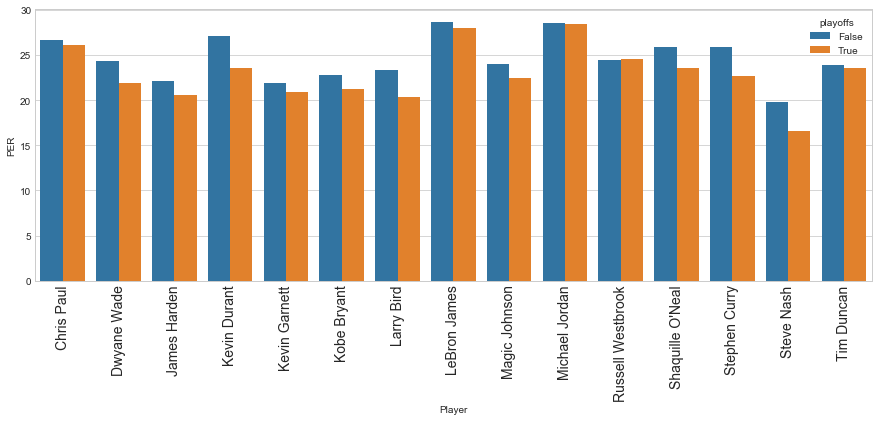

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='Player', y='PER', hue='playoffs', data=df)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)

In [9]:
# Create 'difference' column between playoffs/non-playoffs.
# NOTE: VALUES IN NON-PLAYOFF ROWS FOR THESE FIELDS WILL BE MEANINGLESS, WILL REMOVE
df['PER_diff'] = df['PER'] - df['PER'].shift()
df['WS/48_diff'] = df['WS/48'] - df['WS/48'].shift()
df['USG%_diff'] = df['USG%'] - df['USG%'].shift()
df['eFG%_diff'] = df['eFG%'] - df['eFG%'].shift()
df['MPG_diff'] = df['MPG'] - df['MPG'].shift()
df['PPG_diff'] = df['PPG'] - df['PPG'].shift()
df['BPM_diff'] = df['BPM']- df['BPM'].shift()

In [10]:
# Remove the non-playoff values
df['PER_diff'] = np.where(df['playoffs']==False, np.nan, df['PER_diff'])
df['WS/48_diff'] = np.where(df['playoffs']==False, np.nan, df['WS/48_diff'])
df['USG%_diff'] = np.where(df['playoffs']==False, np.nan, df['USG%_diff'])
df['eFG%_diff'] = np.where(df['playoffs']==False, np.nan, df['eFG%_diff'])
df['MPG_diff'] = np.where(df['playoffs']==False, np.nan, df['MPG_diff'])
df['PPG_diff'] = np.where(df['playoffs']==False, np.nan, df['PPG_diff'])
df['BPM_diff'] = np.where(df['playoffs']==False, np.nan, df['BPM_diff'])

**NOTE: Does this change depending on seasons that some players weren't in the playoffs?? Maybe trim the datasets to ONLY playoff seasons. UPDATE: This has been done! Dataset is now ONLY seasons for which players made the playoffs**

In [64]:
#df[df['playoffs']==True]
df#.head(10)

,Player,playoffs,BPM,WS/48,PER,USG%,eFG%,MPG,PPG,MPG_diff,PPG_diff,BPM_diff,PER_diff,WS/48_diff,USG%_diff,eFG%_diff
0,Chris Paul,False,8.177778,0.270000,26.633333,24.455556,52.555556,35.091269,19.146426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chris Paul,True,8.588889,0.208556,26.133333,26.400000,53.222222,37.770936,21.560145,2.679667,2.413720,4.111111e-01,-0.500000,-0.061444,1.944444,0.666667
2,Dwyane Wade,False,5.158333,0.181250,24.358333,31.308333,49.991667,35.245944,23.070434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dwyane Wade,True,4.516667,0.139500,21.925000,30.683333,48.925000,38.286468,23.095693,3.040524,0.025259,-6.416667e-01,-2.433333,-0.041750,-0.625000,-1.066667
4,James Harden,False,5.525000,0.206375,22.162500,27.037500,52.062500,33.569488,21.955225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,James Harden,True,5.525000,0.154875,20.562500,26.475000,48.925000,35.054167,21.545544,1.484678,-0.409681,-8.881784e-16,-1.600000,-0.051500,-0.562500,-3.137500
6,Kevin Durant,False,6.514286,0.255714,27.128571,30.728571,55.085714,37.609502,28.471924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kevin Durant,True,4.985714,0.181000,23.514286,30.814286,50.985714,40.810414,28.502720,3.200913,0.030796,-1.528571e+00,-3.614286,-0.074714,0.085714,-4.100000
8,Kevin Garnett,False,4.800000,0.174214,21.878571,24.728571,49.814286,34.998529,18.194591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kevin Garnett,True,4.521429,0.131357,20.907143,24.707143,47.450000,38.478119,18.501679,3.479590,0.307088,-2.785714e-01,-0.971429,-0.042857,-0.021429,-2.364286


### Plot changes in PER in playoffs

In [40]:
df_per_sort = df[df['playoffs'] == True].sort_values(by='PER_diff', ascending=False)
#df_per_sort

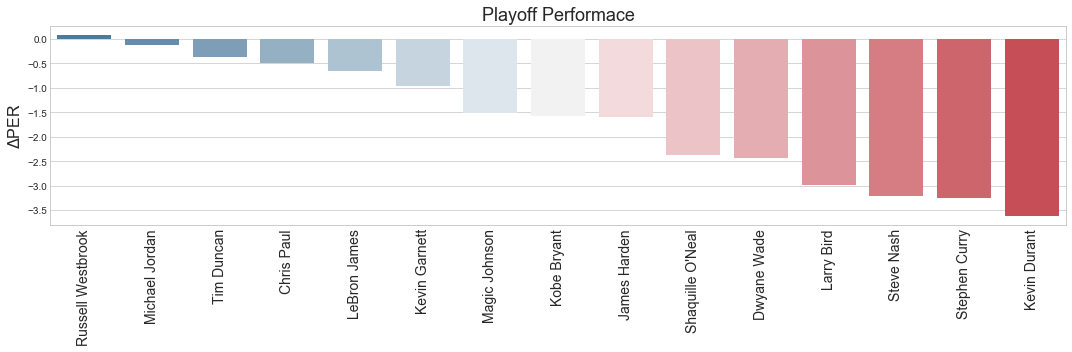

In [72]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='PER_diff', data=df_per_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$PER', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/per_difference.png', dpi=250)

### Plot changes in win shares per 48 mins

In [42]:
df_ws_sort = df[df['playoffs'] == True].sort_values(by='WS/48_diff', ascending=False)
#df_ws_sort

Text(0.5,1,'Playoff Performace')

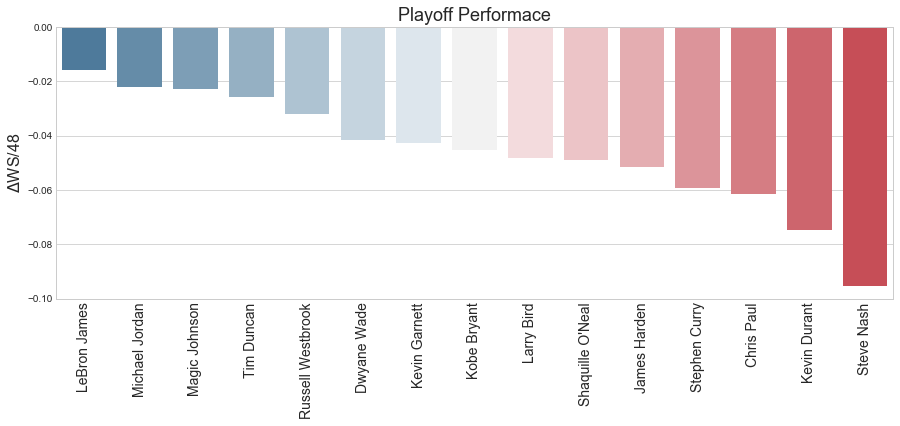

In [43]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='WS/48_diff', data=df_ws_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$WS/48', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

### Plot changes in usage

In [44]:
df_usg_sort = df[df['playoffs'] == True].sort_values(by='USG%_diff', ascending=False)
#df_usg_sort

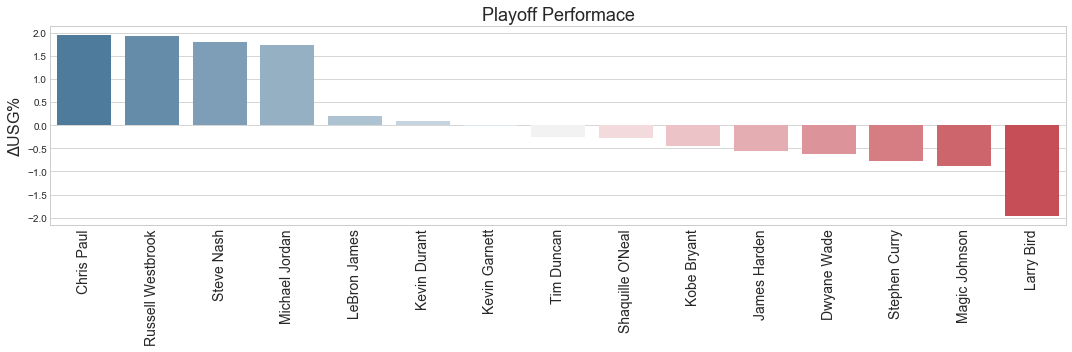

In [73]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='USG%_diff', data=df_usg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$USG%', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/usg_difference.png', dpi=250)

### Plot changes in minutes played

In [47]:
df_mpg_sort = df[df['playoffs'] == True].sort_values(by='MPG_diff', ascending=False)
#df_mpg_sort

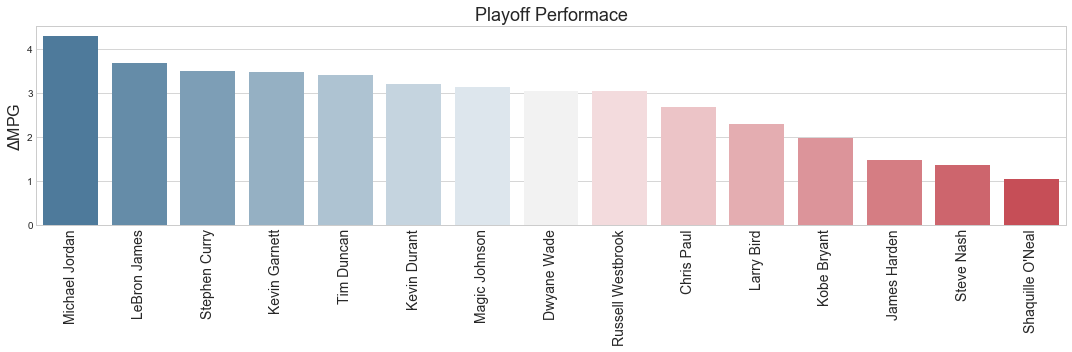

In [74]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='MPG_diff', data=df_mpg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$MPG', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/mpg_difference.png', dpi=250)

### Box plus minus (BPM) difference

In [51]:
df_bpm_sort = df[df['playoffs'] == True].sort_values(by='BPM_diff', ascending=False)
#df_mpg_sort

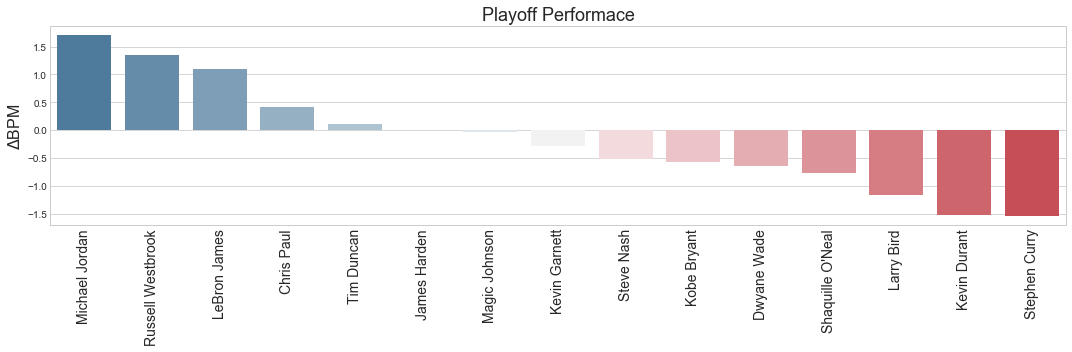

In [75]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='BPM_diff', data=df_bpm_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$BPM', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/bpm_difference.png', dpi=250)

### Raw points per game averages

In [54]:
df_ppg_sort = df[df['playoffs'] == True].sort_values(by='PPG_diff', ascending=False)
#df_ppg_sort

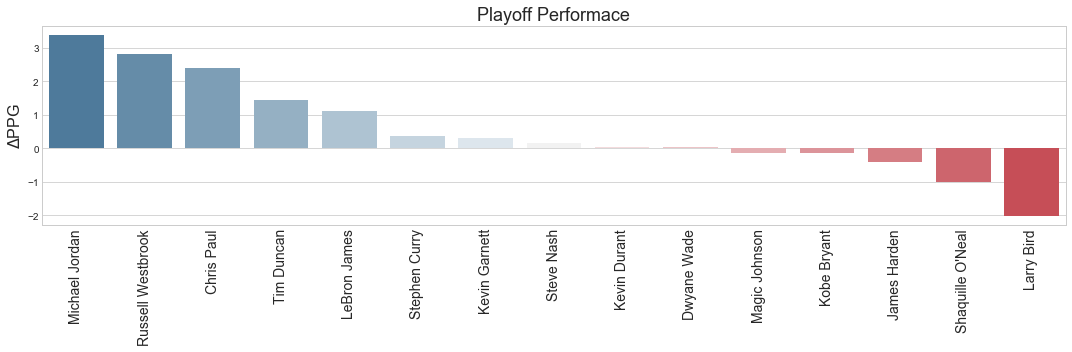

In [76]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='PPG_diff', data=df_ppg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$PPG', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/ppg_difference.png', dpi=250)

### How about shooting efficiency

In [78]:
df_efg_sort = df[df['playoffs'] == True].sort_values(by='eFG%_diff', ascending=False)
#df_efg_sort

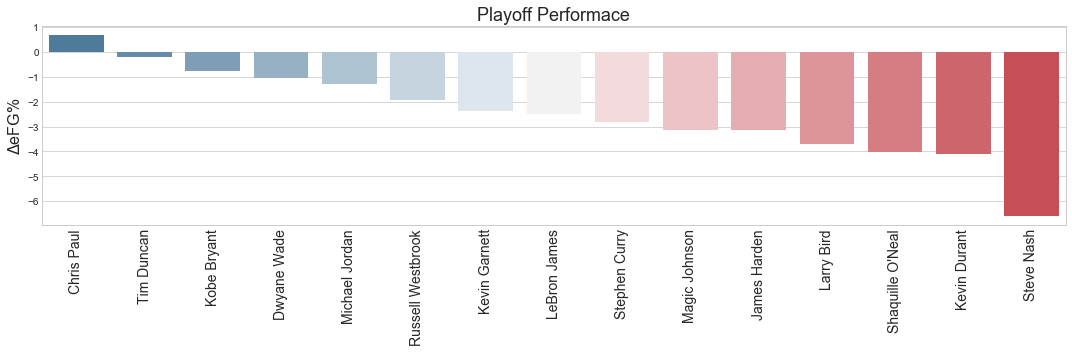

In [79]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='eFG%_diff', data=df_efg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$eFG%', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig('figs/efg_difference.png', dpi=250)

## 6. Now lets plot some line charts showing how these stats change over a players career
Maybe using the 'age' field will be a good choice for the x-axis.

In [11]:
# Maybe start by grouping data by age?
df3 = playoff_seasons_only_df.groupby(['Age', 'Player', 'playoffs'])['BPM', 'PPG', 'MPG', 'WS/48', 'PER', 'USG%', 'eFG%'].mean()

In [12]:
df3 = df3.reset_index()

In [13]:
df3.head()

,Age,Player,playoffs,BPM,PPG,MPG,WS/48,PER,USG%,eFG%
0,18.0,Kobe Bryant,False,-1.7,7.591549,15.535211,0.079,14.4,24.7,0.477
1,18.0,Kobe Bryant,True,-2.8,8.222222,14.777778,0.042,12.5,29.8,0.436
2,19.0,Kobe Bryant,False,0.2,15.443038,26.025316,0.147,18.5,27.2,0.469
3,19.0,Kobe Bryant,True,-3.5,8.727273,20.000000,0.046,12.8,22.5,0.428
4,20.0,James Harden,False,1.0,9.907895,22.868421,0.124,14.0,20.4,0.484


In [14]:
### CAN THIS ALL JUST BE DONE USING GROUPBY OBJECTS???

# Isolate players stats and separate into playoff/non-playoff
df3_kobe_playoffs = df3.loc[(df3['Player']=='Kobe Bryant') & (df3['playoffs']==True)]
df3_kobe_nonplayoffs = df3.loc[(df3['Player']=='Kobe Bryant') & (df3['playoffs']==False)]

#df3_kobe_playoffs

Text(0.5,0,'Age')

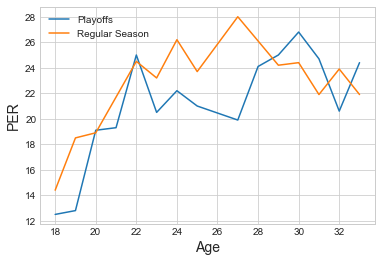

In [15]:
plt.plot(df3_kobe_playoffs['Age'], df3_kobe_playoffs['PER'], label='Playoffs')
plt.plot(df3_kobe_nonplayoffs['Age'], df3_kobe_nonplayoffs['PER'], label='Regular Season')
plt.legend()
plt.ylabel('PER', fontsize=14)
plt.xlabel("Age", fontsize=14)

Maybe could just plot the **difference** between regular season and playoff PER's so that we can fit all of the players on a single plot.

In [16]:
# Create 'difference' column between playoffs/non-playoffs.
# NOTE: VALUES IN NON-PLAYOFF ROWS FOR THESE FIELDS WILL BE MEANINGLESS, WILL REMOVE
df3['PER_diff'] = df3['PER'] - df3['PER'].shift()
df3['WS/48_diff'] = df3['WS/48'] - df3['WS/48'].shift()
df3['USG%_diff'] = df3['USG%'] - df3['USG%'].shift()
df3['eFG%_diff'] = df3['eFG%'] - df3['eFG%'].shift()
df3['MPG_diff'] = df3['MPG'] - df3['MPG'].shift()
df3['PPG_diff'] = df3['PPG'] - df3['PPG'].shift()
df3['BPM_diff'] = df3['BPM'] - df3['BPM'].shift()

# Remove the non-playoff values
df3['PER_diff'] = np.where(df3['playoffs']==False, np.nan, df3['PER_diff'])
df3['WS/48_diff'] = np.where(df3['playoffs']==False, np.nan, df3['WS/48_diff'])
df3['USG%_diff'] = np.where(df3['playoffs']==False, np.nan, df3['USG%_diff'])
df3['eFG%_diff'] = np.where(df3['playoffs']==False, np.nan, df3['eFG%_diff'])
df3['MPG_diff'] = np.where(df3['playoffs']==False, np.nan, df3['MPG_diff'])
df3['PPG_diff'] = np.where(df3['playoffs']==False, np.nan, df3['PPG_diff'])
df3['BPM_diff'] = np.where(df3['playoffs']==False, np.nan, df3['BPM_diff'])

In [17]:
df3_playoffs = df3[df3['playoffs']==True]

### Make line chart plotting difference between regular season and playoff PER's for each player

In [18]:
df3_playoffs[df3_playoffs['Player']=='Kobe Bryant']['Age']

1      18.0
3      19.0
9      20.0
19     21.0
43     22.0
69     23.0
93     24.0
121    25.0
171    27.0
197    28.0
221    29.0
241    30.0
261    31.0
279    32.0
293    33.0
Name: Age, dtype: float64

Text(0.5,0,'Age')

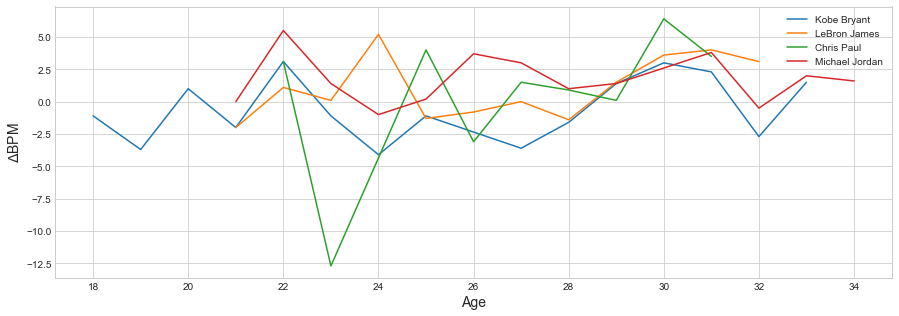

In [19]:
plt.figure(figsize=(15,5))

# Player entries
plt.plot(df3_playoffs[df3_playoffs['Player']=='Kobe Bryant']['Age'], \
         df3_playoffs[df3_playoffs['Player']=='Kobe Bryant']['BPM_diff'], \
         label='Kobe Bryant')
plt.plot(df3_playoffs[df3_playoffs['Player']=='LeBron James']['Age'], \
         df3_playoffs[df3_playoffs['Player']=='LeBron James']['BPM_diff'], \
         label='LeBron James')
plt.plot(df3_playoffs[df3_playoffs['Player']=='Chris Paul']['Age'], \
         df3_playoffs[df3_playoffs['Player']=='Chris Paul']['BPM_diff'], \
         label='Chris Paul')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='Kevin Durant']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='Kevin Durant']['PER_diff'], \
#         label='Kevin Durant')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='Russell Westbrook']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='Russell Westbrook']['PER_diff'], \
#         label='Russell Westbrook')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='James Harden']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='James Harden']['PER_diff'], \
#         label='James Harden')
plt.plot(df3_playoffs[df3_playoffs['Player']=='Michael Jordan']['Age'], \
         df3_playoffs[df3_playoffs['Player']=='Michael Jordan']['BPM_diff'], \
         label='Michael Jordan')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='Stephen Curry']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='Stephen Curry']['PER_diff'], \
#         label='Stephen Curry')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='Tim Duncan']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='Tim Duncan']['PER_diff'], \
#         label='Tim Duncan')
#plt.plot(df3_playoffs[df3_playoffs['Player']=='Dwyane Wade']['Age'], \
#         df3_playoffs[df3_playoffs['Player']=='Dwyane Wade']['PER_diff'], \
#         label='Dwyane Wade')

# Plot formatting
plt.legend()
plt.ylabel('$\Delta$BPM', fontsize=14)
plt.xlabel("Age", fontsize=14)

### How does PER difference change over a players career

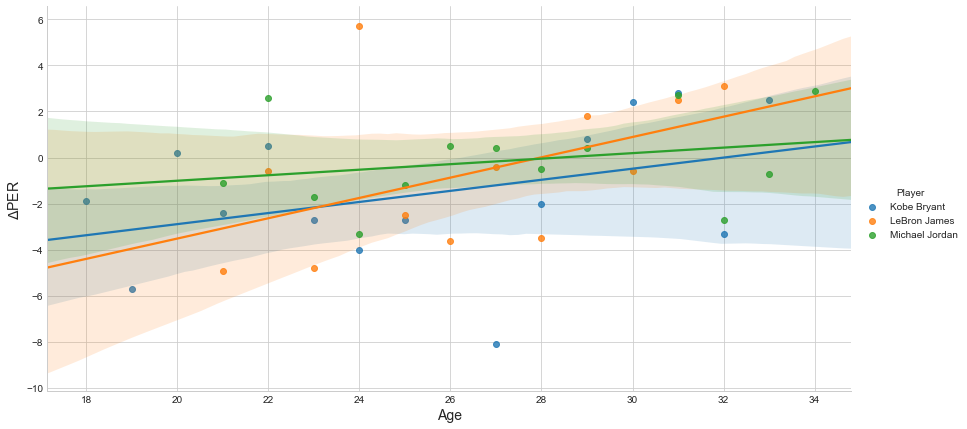

In [24]:
#plt.figure(figsize=(15,5))
players = ["Kobe Bryant", "LeBron James", "Michael Jordan"]
df3_playoffs_subset = df3_playoffs[df3_playoffs.Player.isin(players)]

# Create Seaborn plot
sns.lmplot(x="Age", y="PER_diff", data=df3_playoffs_subset, hue="Player", size=6, aspect=2)
plt.ylabel('$\Delta$PER', fontsize=14)
plt.xlabel("Age", fontsize=14)

# Save the figure
#plt.tight_layout()
#plt.savefig('figs/PER-age-scatter.png', dpi=250, transparent=True)
plt.savefig('figs/PER-age-scatter.pdf', dpi=250, transparent=True)

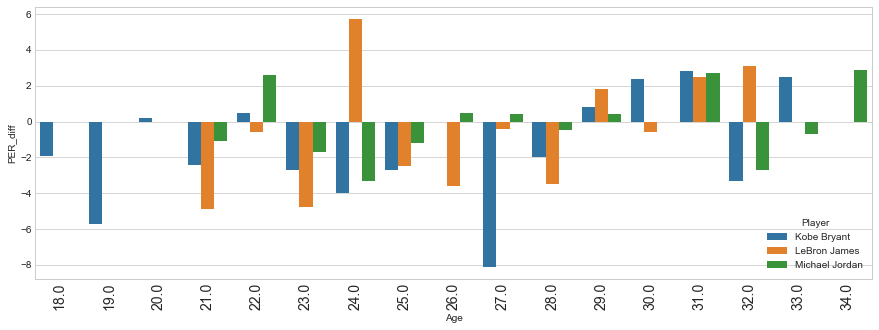

In [27]:
#plt.figure(figsize=(15,5))
players = ["Kobe Bryant", "LeBron James", "Michael Jordan"]
df3_playoffs_subset = df3_playoffs[df3_playoffs.Player.isin(players)]

plt.figure(figsize=(15,5))
sns.barplot(x='Age', y='PER_diff', hue='Player', data=df3_playoffs_subset)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)

# Save the figure
#plt.tight_layout()
plt.savefig('figs/PER-age-bar.pdf', dpi=250, transparent=True)
#plt.savefig('figs/PER-age-bar.png', dpi=250, transparent=True)

### How does BPM difference change over a players career

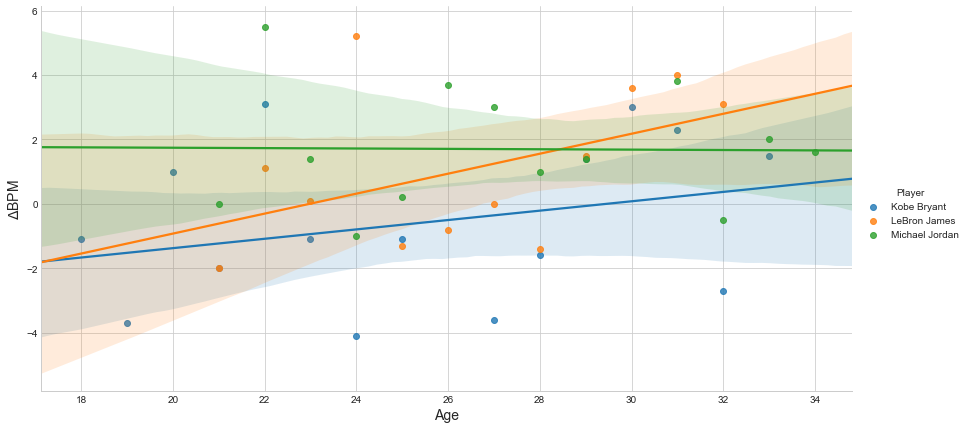

In [26]:
#plt.figure(figsize=(15,5))
players = ["Kobe Bryant", "LeBron James", "Michael Jordan"]
df3_playoffs_subset = df3_playoffs[df3_playoffs.Player.isin(players)]

# Create Seaborn plot
sns.lmplot(x="Age", y="BPM_diff", data=df3_playoffs_subset, hue="Player", size=6, aspect=2)
plt.ylabel('$\Delta$BPM', fontsize=14)
plt.xlabel("Age", fontsize=14)

# Save the figure
#plt.tight_layout()
#plt.savefig('figs/BPM-age-scatter.png', dpi=250)
plt.savefig('figs/BPM-age-scatter.pdf', dpi=250, transparent=True)

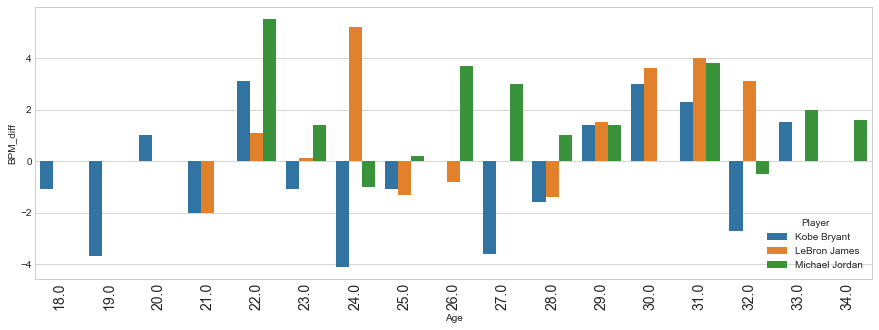

In [28]:
#plt.figure(figsize=(15,5))
players = ["Kobe Bryant", "LeBron James", "Michael Jordan"]
df3_playoffs_subset = df3_playoffs[df3_playoffs.Player.isin(players)]

plt.figure(figsize=(15,5))
sns.barplot(x='Age', y='BPM_diff', hue='Player', data=df3_playoffs_subset)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)

# Save the figure
#plt.tight_layout()
plt.savefig('figs/BPM-age-bar.pdf', dpi=250, transparent=True)
#plt.savefig('figs/PER-age-bar.png', dpi=250, transparent=True)